##  Loading libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
from gensim.models import word2vec
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import gensim
import re

/usr/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
df=pd.read_csv('/home/shahules786/Dating-Recommendation-System-master/dataset/Matrimony Dataset Final.csv')

In [3]:
df.shape


(9999, 26)

Text(0.5, 1.0, 'Missing values column wise ')

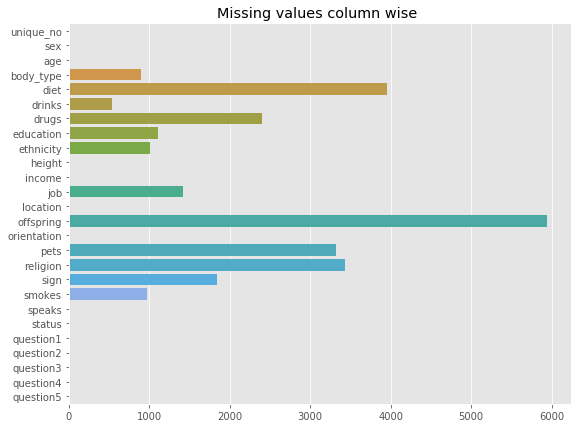

In [5]:
plt.figure(figsize=(9,7))
missing=df.isna().sum()
sns.barplot(x=missing,y=missing.index)
plt.title("Missing values column wise ")

- We need to explore each columns and handle missing values appropriately.

In [6]:
df.head()

,unique_no,sex,age,body_type,diet,drinks,drugs,education,ethnicity,height,...,religion,sign,smokes,speaks,status,question1,question2,question3,question4,question5
0,0,m,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75,...,agnosticism and very serious about it,gemini,sometimes,english,single,3,9,4,8,8
1,1,m,35,average,mostly other,often,sometimes,working on space camp,white,70,...,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",single,2,9,1,10,9
2,2,m,38,thin,anything,socially,NaN,graduated from masters program,NaN,68,...,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,7,3,1,6,5
3,3,m,23,thin,vegetarian,socially,NaN,working on college/university,white,71,...,NaN,pisces,no,"english, german (poorly)",single,7,9,3,2,4
4,4,m,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66,...,NaN,aquarius,no,english,single,10,10,9,1,2


## EDTA

### Male to Female Ratio

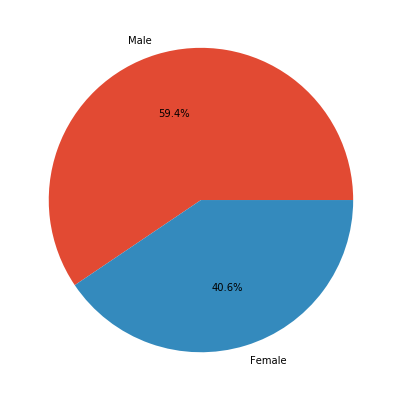

In [7]:
plt.figure(figsize=(7,7))
sex=df['sex'].value_counts()
plt.pie(x=sex,labels=['Male','Female'],autopct='%1.1f%%')
plt.show()

- So the male to female ratio is not equal.This can be considered as a real life scenario.

### Distribution of Age

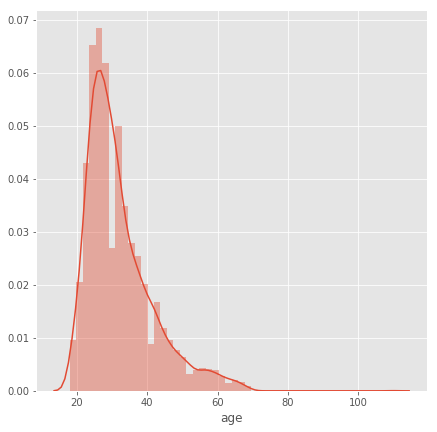

In [8]:
plt.figure(figsize=(7,7))
sns.distplot(df['age'])

- Age is not uniformly distributed,There are people of ages more than 60.This needs further investigation

####  Boxplot of age distribution genderwise

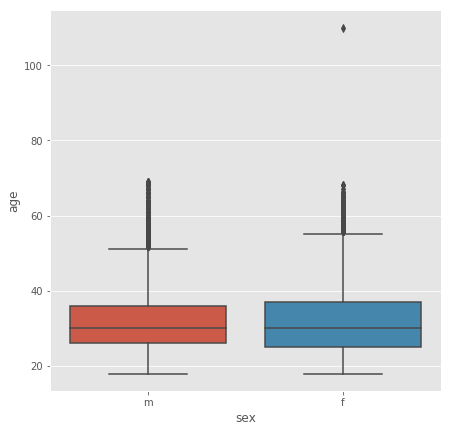

In [9]:
plt.figure(figsize=(7,7))
sns.boxplot(y='age',x='sex',data=df)

- So in both males and females 50% of values are in between 20 and 40 years of age.  
- Mean age is almost the same in both geders.

### Body type

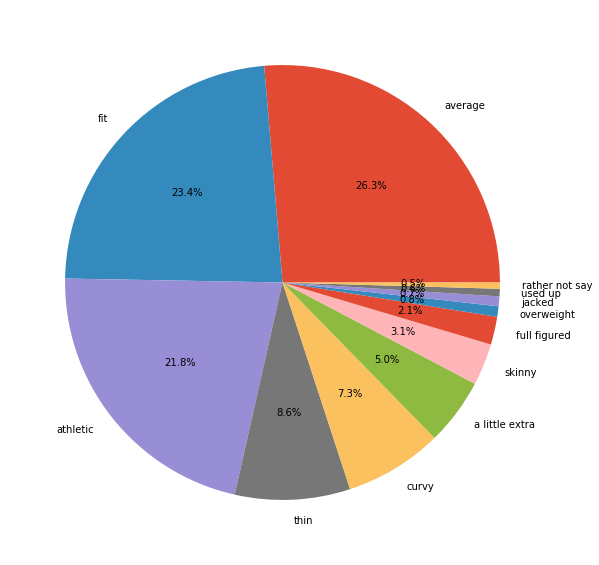

In [10]:
plt.figure(figsize=(10,10))
body=df['body_type'].value_counts()
plt.pie(x=body,labels=body.index,autopct='%1.1f%%')
plt.show()

- I think we should reduce the categories to 4 or 5.  
- This many categories can lead to confusions and increase in dimension on encoding.

In [11]:
print("There are {} unique values in body type column".format(df['body_type'].nunique()))

There are 12 unique values in body type column


Reducing it to five categories
- we will map  all the below categories to fat
- ("curvy","a little extra","full figured","overweight","jacked","used up","rather not say")

In [12]:
fat_list=("curvy","a little extra","full figured","overweight","jacked","used up","rather not say")
df['body_type']=df['body_type'].apply(lambda x : "fat" if x in fat_list else x)
thin=("skinny","thin")
df['body_type']=df['body_type'].apply(lambda x : "thin" if x in thin else x)

In [13]:
print("There are {} missing values in body type column".format(df['body_type'].isna().sum()))
df['body_type'].fillna(method='ffill',inplace=True)

There are 896 missing values in body type column


- We will handle it by filling the values in forward fill manner.

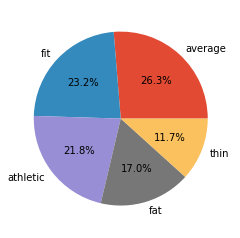

In [14]:

body=df['body_type'].value_counts()
plt.pie(x=body,labels=body.index,autopct='%1.1f%%')
plt.show()

- you can see that I have reduced categories to five and have succesfully filled all the null values 

### Diet type

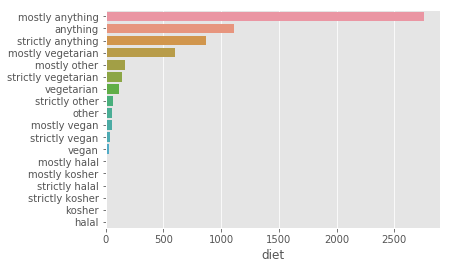

In [15]:
diet=df['diet'].value_counts()
sns.barplot(y=diet.index,x=diet)

In [16]:
print("There are {} unique values in body type column".format(df['diet'].nunique()))

There are 18 unique values in body type column


- We will reduce the categories in the following manner.

In [17]:
halal=("halal","mostly halal","strictly halal")
kosher=("kosher","strictly kosher","mostly kosher")
vegan=("vegan","mostly vegan","strictly vegan")
other=("other","mostly other","strictly other")
veg=("vegetarian","mostly vegetarian","strictly vegetarian")
any_=("mostly anything","anything","strictly anything")

In [18]:
df['diet']=df['diet'].apply(lambda x: "halal" if x in halal  else x)
df['diet']=df['diet'].apply(lambda x: "kosher" if x in kosher  else x)
df['diet']=df['diet'].apply(lambda x: "vegan" if x in vegan  else x)
df['diet']=df['diet'].apply(lambda x: "vegetarian" if x in veg  else x)
df['diet']=df['diet'].apply(lambda x: "anything" if x in any_  else x)
df['diet']=df['diet'].apply(lambda x: "other" if x in other  else x)

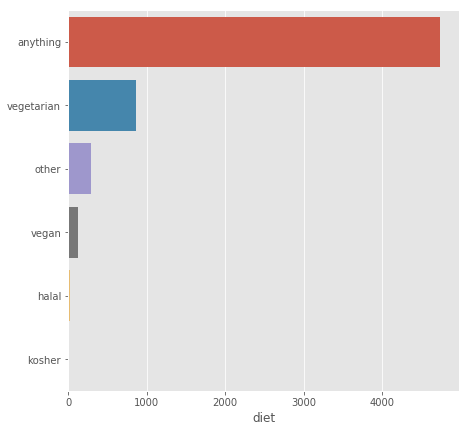

In [19]:
plt.figure(figsize=(7,7))
diet=df['diet'].value_counts()
sns.barplot(diet,diet.index)
plt.show()

- I have reduced diet types into 6 categories.
- Next we will handle missing values by filling it with "anything" type.

In [20]:
print("There are {} missing values in diet column".format(df['diet'].isna().sum()))

There are 3952 missing values in diet column


In [21]:
df['diet'].fillna("anything",inplace=True)

### Drinks

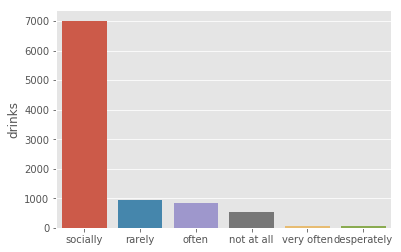

In [22]:
x=df['drinks'].value_counts()
sns.barplot(x.index,x)

- There aren't my categories in drinks column,so we will go on to handle missing values.

In [23]:
print("There are {} missing values in diet column".format(df['drinks'].isna().sum()))

There are 532 missing values in diet column


In [24]:
df['drinks'].fillna("socially",inplace=True)

### Drugs

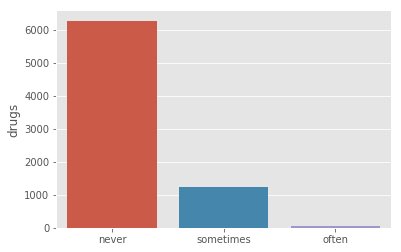

In [25]:
x=df['drugs'].value_counts()
sns.barplot(x.index,x)

- There aren't my categories in drugs column,so we will go on to handle missing values.m

In [26]:
print("There are {} missing values in drugs column".format(df['drugs'].isna().sum()))
df['drugs'].fillna("never",inplace=True)

There are 2403 missing values in drugs column


### Education

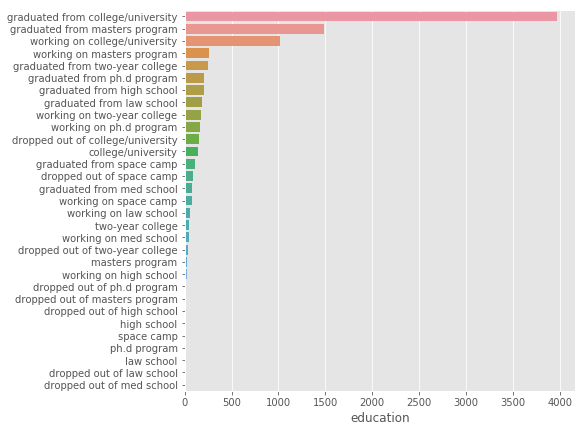

In [27]:
plt.figure(figsize=(7,7))
x=df['education'].value_counts()
sns.barplot(x,x.index)

### Sign

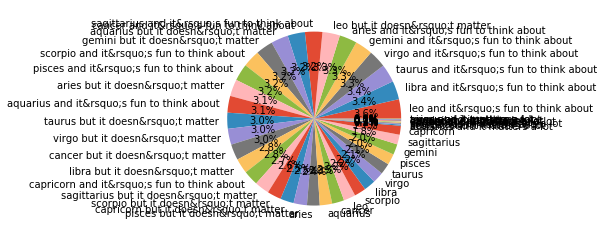

In [28]:
df['sign'].fillna(method='ffill',inplace=True)
body=df['sign'].value_counts()
plt.pie(x=body,labels=body.index,autopct='%1.1f%%')
plt.show()

- Its a mess !
- we will clear that out

In [29]:
df['sign']=df['sign'].apply(lambda x : x.split()[0] if type(x)==str else np.nan)

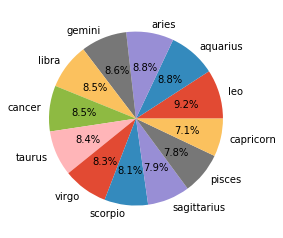

In [30]:
df['sign'].fillna(method='ffill',inplace=True)
body=df['sign'].value_counts()
plt.pie(x=body,labels=body.index,autopct='%1.1f%%')
plt.show()

I think we can provide a seperate option in which user can input the degree of seriousness user gives to his/her sign.(like 0 if he/she considers it as funny and 5 if user is serious about sign)



## Ethnicity

- As ethnicity is inputted by user as a Natural Language input,We will vectorize it using Countvectorizer.

In [31]:
df['ethnicity'].fillna(method='ffill',inplace=True)


In [32]:
df['ethnicity']=df['ethnicity'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))

In [33]:
corpus=' '.join(x for x in df['ethnicity'].values)

In [34]:
tokens=word_tokenize(corpus)

In [35]:
countvec=CountVectorizer()
countvec.fit(tokens)
x=countvec.transform(tokens)

In [36]:
df['ethnicity'].head()

0           asian  white
1                  white
2                  white
3                  white
4    asian  black  other
Name: ethnicity, dtype: object

In [37]:
(x.toarray())[4]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [38]:
#y=countvec.transform(['asian','native'])
#x=gensim.matutils.Sparse2Corpus(y,documents_columns=False)

In [39]:
countvec=TfidfVectorizer()
countvec.fit(tokens)
vect=[]
for x in df['ethnicity'].values.tolist():
    x=countvec.transform(word_tokenize(x))
    vect.append(x.toarray())


- Let us check

In [40]:
df.iloc[6]['ethnicity']

'white  other'

In [41]:
vect[6]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

- You can see that we have vectorized each input to 0 and 1 form.

## religion

In [42]:
df['religion']=df['religion'].apply(lambda x :  x.split()[0] if type(x)==str else x)
df['religion'].fillna('other',inplace=True)

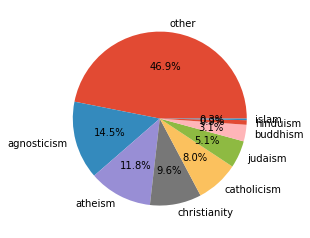

In [43]:

body=df['religion'].value_counts()
plt.pie(x=body,labels=body.index,autopct='%1.1f%%')
plt.show()

### Language

In [44]:
df['speaks']=df['speaks'].apply(lambda x :  x.split(' ')[0] if type(x)==str else x)

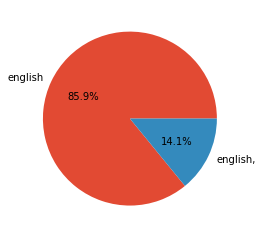

In [45]:

body=df['speaks'].value_counts()
plt.pie(x=body,labels=body.index,autopct='%1.1f%%')
plt.show()

- You can see that all users has inputted "english" as their primary language.This is because of the data is collected from U.S,users has also inputted other languages but we will ignore it for now.

In [46]:
df['weight']=np.random.randint(50,100,size=df.shape[0])


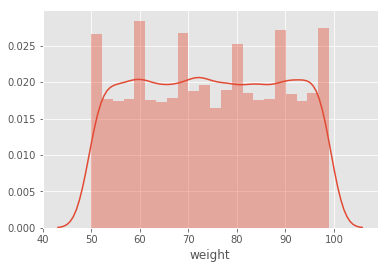

In [47]:
sns.distplot(df['weight'])

In [48]:
df.head()

,unique_no,sex,age,body_type,diet,drinks,drugs,education,ethnicity,height,...,sign,smokes,speaks,status,question1,question2,question3,question4,question5,weight
0,0,m,22,fat,anything,socially,never,working on college/university,asian white,75,...,gemini,sometimes,english,single,3,9,4,8,8,56
1,1,m,35,average,other,often,sometimes,working on space camp,white,70,...,cancer,no,english,single,2,9,1,10,9,96
2,2,m,38,thin,anything,socially,never,graduated from masters program,white,68,...,pisces,no,"english,",available,7,3,1,6,5,92
3,3,m,23,thin,vegetarian,socially,never,working on college/university,white,71,...,pisces,no,"english,",single,7,9,3,2,4,93
4,4,m,29,athletic,anything,socially,never,graduated from college/university,asian black other,66,...,aquarius,no,english,single,10,10,9,1,2,78


In [49]:
df.to_csv("cleaned_data.csv",index=False)

## TO DO

- Apply pd.get_dummies() to on hot encode all columns other than ethnicity.
- This will convert entire data to 0 and 1 form which can be fed to any ML/DL models.


28/7/19 : This is not in the plan anymore !